# Experiment - one function to preprocess, Stage 1 and Stage 2 hyper param optimization, plot the trails results

# Use it to find optimal results of LDA model

# This is example of how to run several experiments changing preprocessing params, such as ngrams, min_df

# Ordinary imports

In [1]:
import numpy as np
import pandas as pd
import math
import csv

from datetime import datetime

import os.path
from os import path
import time

import matplotlib.pyplot as plt
import seaborn as sns

import re
import scipy
import nltk
import gensim
import spacy

from functools import partial
import json

In [2]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [3]:
import string

import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag

import nltk
nltk.download('wordnet')

from nltk.stem.porter import PorterStemmer # simple one
from nltk.stem.snowball import SnowballStemmer # Porter 2
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dany-\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dany-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Imports of custom functions for two step hyper param optimization and experiment

In [4]:
import topic_model_hyper_param_opt

# Some constants (path and random seeed)

In [5]:
some_constants = pd.read_csv('some_constants.txt', sep=',', delimiter = ",", header='infer', index_col='variable_name')
some_constants

,value
variable_name,
directory_path,C:/DAN/t_systems/topic_model_lda_hyper_params_opt
random_seed,420


In [6]:
# Path to folder with directory is a constant value that stores in .txt
# You can change them in some_constants.txt file or define them on your own.
directory_path = str(some_constants.loc['directory_path'][0])
random_seed = int(some_constants.loc['random_seed'][0])
print(random_seed)
print(directory_path)

420
C:/DAN/t_systems/topic_model_lda_hyper_params_opt


## Read the data

In [7]:
# Read the data with texts
texts_df = pd.read_csv('datasets/texts_10kGNAD.csv')
texts_df['text'] = texts_df['text'].astype('str')
texts_df.tail(2)

,Unnamed: 0,label,text
10271,10271,Wissenschaft,Klimatische Verschlechterungen dürften zur Auf...
10272,10272,Wissenschaft,Knochen können zum Verständnis des Lebens in d...


# Experiment for several cols

## Set up experiments

In [8]:
# Set the lists of values
experiment_dict = {
    'min_df_cut_off': [0.01, 0.005, 0.005],
    'max_df_cut_off': [1.0, 1.0, 1.0],
    'ngram_range': [(1, 2), (1, 2), (1, 2)],
    'metric_to_optimize': ['coherence', 'coherence', 'perplexity']
}

In [9]:
print('There are several setted up experiments with these params')
for i in range(0, len(experiment_dict['ngram_range'])):
    print('Experiment', i,':')
    for dict_key in list(experiment_dict.keys()):
        print('   ', dict_key, ':', experiment_dict[dict_key][i],)
    print()

There are several setted up experiments with these params
Experiment 0 :
    min_df_cut_off : 0.01
    max_df_cut_off : 1.0
    ngram_range : (1, 2)
    metric_to_optimize : coherence

Experiment 1 :
    min_df_cut_off : 0.005
    max_df_cut_off : 1.0
    ngram_range : (1, 2)
    metric_to_optimize : coherence

Experiment 2 :
    min_df_cut_off : 0.005
    max_df_cut_off : 1.0
    ngram_range : (1, 2)
    metric_to_optimize : perplexity



In [10]:
custom_stop_words = [
    'nan', # For empty nan texts
    # stop words from 10kGNAD datasets
    'ja', 'nein', 'nr', 'nee',
    'fuer', 'ueber', 'mehr', 'ab', 'beim', 
    'wurde', 'worden', 'wurden', 'wuerde', 'waere', 
    'bereits',
]

## Run experiments

text
0
+col_name_text_text+ngrams_(1, 2)+min_df_0.01+num_topics_min_max_8_16+metric_to_optimize_coherence
texts_df.shape: (10273, 4)
data_dtm.shape: (10273, 2694)
100%|████████████████████████████████████████████████| 50/50 [24:12<00:00, 29.05s/trial, best loss: 1.6296604989245072]
params_optimal_stage_1: {'alpha': 0.005, 'decay': 0.9, 'offset': 16, 'eta': 'auto', 'gamma_threshold': 0.001, 'minimum_probability': 0.1}
100%|████████████████████████████████████████████████| 15/15 [08:08<00:00, 32.55s/trial, best loss: 1.6676963770785913]
optimal_params_result: {'alpha': 0.005, 'decay': 0.9, 'offset': 16, 'eta': 'auto', 'gamma_threshold': 0.001, 'minimum_probability': 0.1, 'num_topics': 7.0}
text
1
+col_name_text_text+ngrams_(1, 2)+min_df_0.005+num_topics_min_max_8_16+metric_to_optimize_coherence
texts_df.shape: (10273, 4)
data_dtm.shape: (10273, 5416)
100%|████████████████████████████████████████████████| 50/50 [26:24<00:00, 31.70s/trial, best loss: 1.5858448175847246]
params_optimal_stag

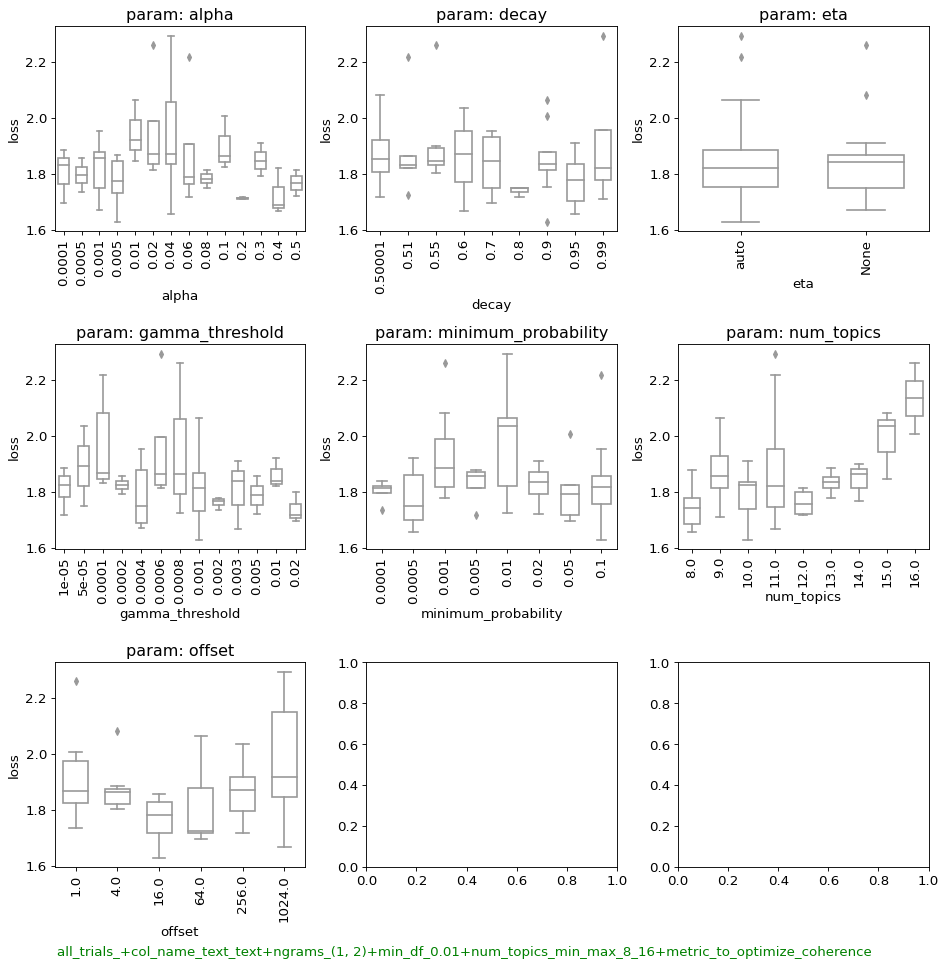

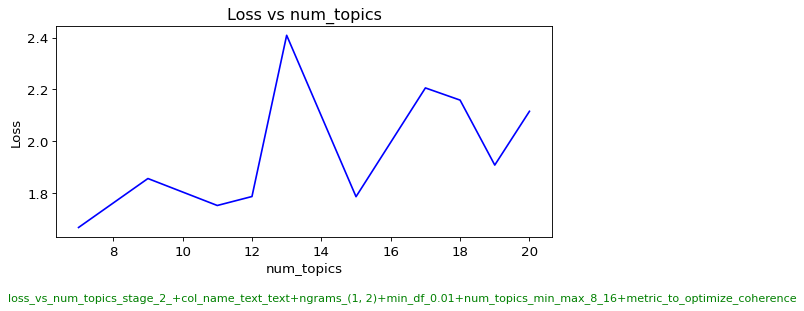

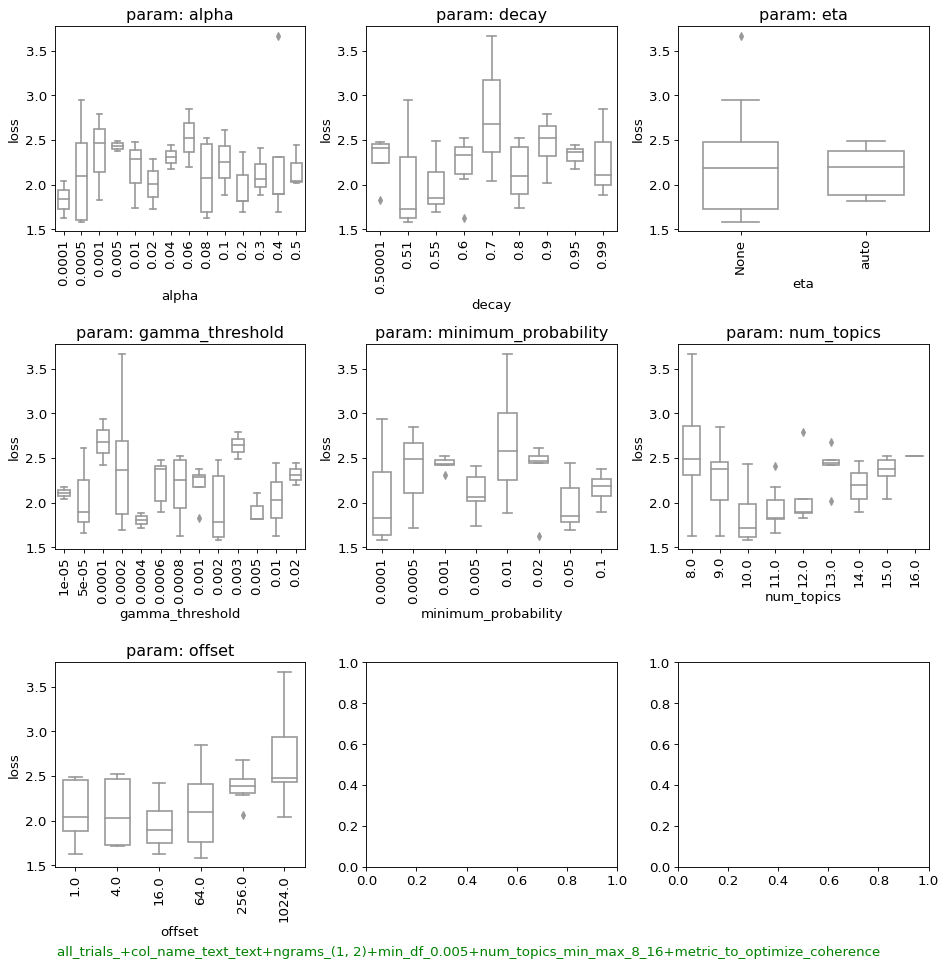

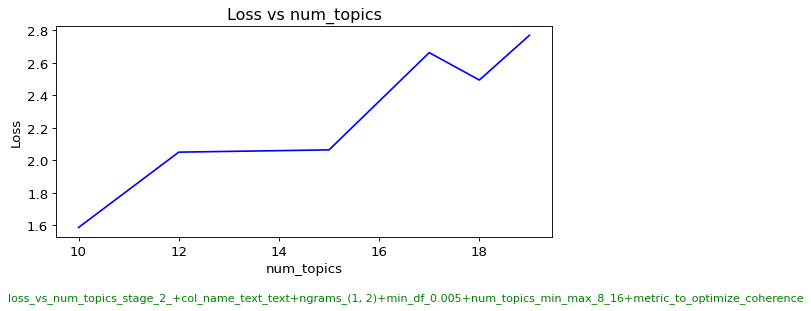

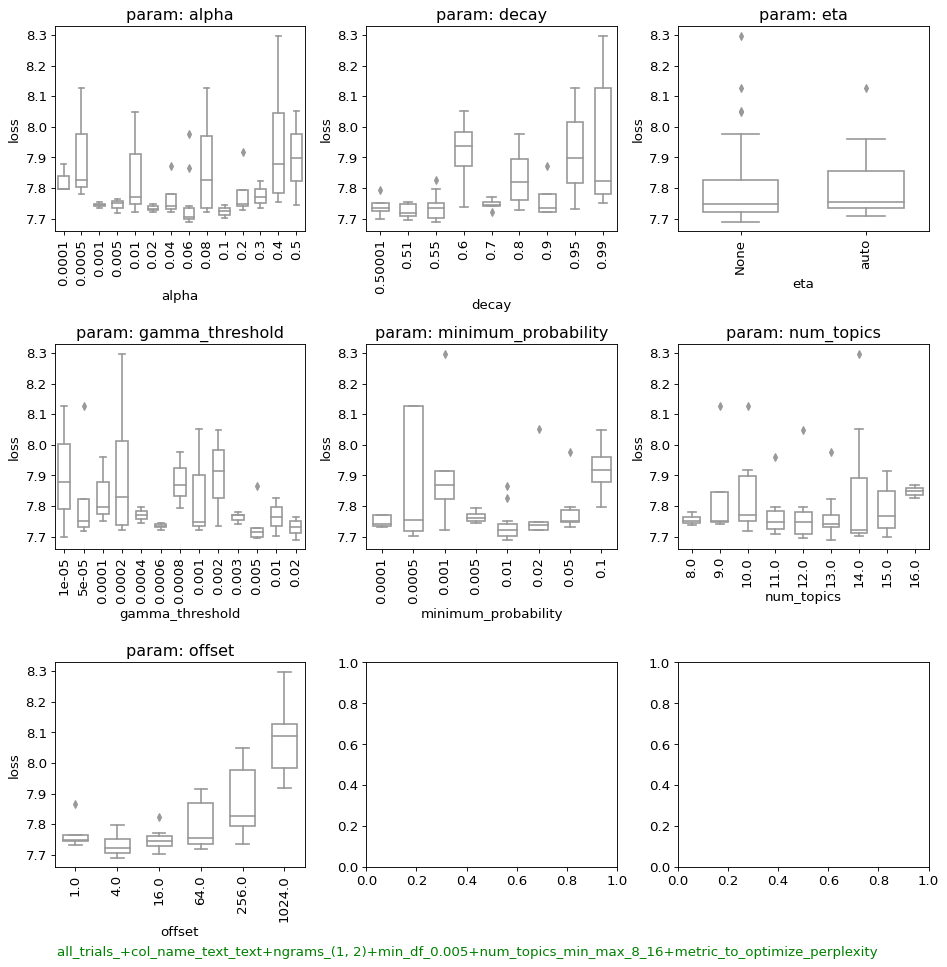

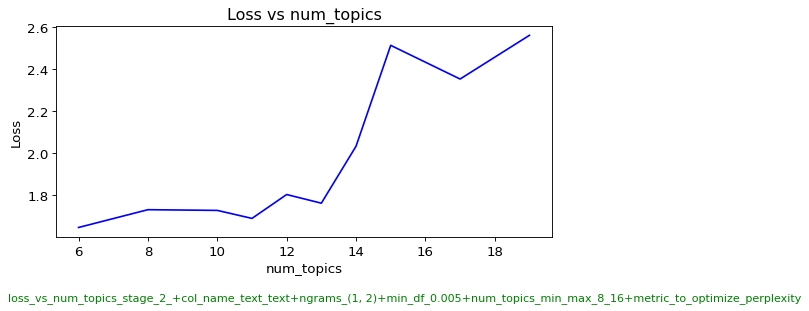

In [12]:
from topic_model_hyper_param_opt import preprocessing_and_hyper_opt_and_plots_gensim_ldamodel

# To apply these experiments wiht several columns in a row
# add another loop with:
# for col_name in ['col_name_1', 'col_name_2', 'col_name_3']

col_name = 'text'
for i in range(0, len(experiment_dict['ngram_range'])):
    print(col_name)
    print(i)

    preprocessing_and_hyper_opt_and_plots_gensim_ldamodel(
        texts_df=texts_df.loc[texts_df[col_name] != 'nan'], # nans filtering
        col_name_text_in_df=col_name,
        custom_stop_words=custom_stop_words,
        text_lang='german',
        min_df_cut_off=experiment_dict['min_df_cut_off'][i],
        max_df_cut_off=experiment_dict['max_df_cut_off'][i],
        ngram_range=experiment_dict['ngram_range'][i],
        metric_to_optimize=experiment_dict['metric_to_optimize'][i],
        stage_1_params={
            'num_of_topics_min': 8,
            'num_of_topics_max': 16,
            'passes_param': 5,
            'iterations_param': 55,
            'max_eval_param': 50, # set it as 1000+
            'timeout_param': 86400,
        },
        stage_2_params={
            'num_of_topics_min': 6,
            'num_of_topics_max': 20,
            'passes_param': 5,
            'iterations_param': 55,
            'max_eval_param': 15, # set it as num_of_topics_max minus num_of_topics_min
            'timeout_param': 86400, 
        },
        path_to_folder='experiments_outputs/',
        random_seed=random_seed
    )

# Observe experiments results

## Print all json files with optimal params

In [13]:
def get_files_names_from_folder(folder_name):
    # Create empty df.
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "file_path", "file_extension"
    ])
    # Get files names from selected folder.
    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_path'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates['is_opt_param'] = files_creation_dates['file_name'].apply(lambda x: 'optimal_params_result' in x)
    # Add column with files extensions.
    files_creation_dates['file_extension'] = files_creation_dates['file_name'].apply(lambda x: x.split('.')[-1])
    
    return files_creation_dates

In [17]:
import pprint

files_in_folder_df = get_files_names_from_folder('experiments_outputs/')
print(list(files_in_folder_df.columns))
print()

list_files = list(files_in_folder_df[files_in_folder_df['file_extension'] == 'json']['file_path'])
list_files.sort()

for elem in list_files:
    with open(elem) as json_file:
        json_variable = json.load(json_file)
    print(elem.split('/')[-1])
    # Prints the nicely formatted dictionary
    pprint.pprint(json_variable)
    print()
    json_file.close()

['folder_name', 'file_name', 'file_path', 'file_extension', 'is_opt_param']

optimal_params_result+col_name_text_text+ngrams_(1, 2)+min_df_0.005+num_topics_min_max_8_16+metric_to_optimize_coherence.json
{'alpha': 0.0005,
 'decay': 0.51,
 'eta': None,
 'gamma_threshold': 0.002,
 'minimum_probability': 0.0001,
 'num_topics': 10.0,
 'offset': 64}

optimal_params_result+col_name_text_text+ngrams_(1, 2)+min_df_0.005+num_topics_min_max_8_16+metric_to_optimize_perplexity.json
{'alpha': 0.06,
 'decay': 0.55,
 'eta': None,
 'gamma_threshold': 0.02,
 'minimum_probability': 0.01,
 'num_topics': 6.0,
 'offset': 4}

optimal_params_result+col_name_text_text+ngrams_(1, 2)+min_df_0.01+num_topics_min_max_8_16+metric_to_optimize_coherence.json
{'alpha': 0.005,
 'decay': 0.9,
 'eta': 'auto',
 'gamma_threshold': 0.001,
 'minimum_probability': 0.1,
 'num_topics': 7.0,
 'offset': 16}

params_optimal_stage_1+col_name_text_text+ngrams_(1, 2)+min_df_0.005+num_topics_min_max_8_16+metric_to_optimize_coherence.js

## Filter trials

In [15]:
# Read trials df from saved files.
trials_stage_2_df = pd.read_csv('experiments_outputs/trials_stage_2_df+col_name_text_text+ngrams_(1, 2)+min_df_0.01+num_topics_min_max_8_20+metric_to_optimize_coherence.csv')
trials_stage_1_df = pd.read_csv('experiments_outputs/trials_stage_1_df+col_name_text_text+ngrams_(1, 2)+min_df_0.01+num_topics_min_max_8_20+metric_to_optimize_coherence.csv')

# Convert string representation of dictionary to dict
from ast import literal_eval

trials_stage_1_df['result'] = trials_stage_1_df['result'].apply(lambda x: literal_eval(x))
trials_stage_1_df['misc'] = trials_stage_1_df['misc'].apply(lambda x: literal_eval(x))

trials_stage_2_df['result'] = trials_stage_2_df['result'].apply(lambda x: literal_eval(x))
trials_stage_2_df['misc'] = trials_stage_2_df['misc'].apply(lambda x: literal_eval(x))

trials_stage_1_df.tail(2)

,Unnamed: 0,state,tid,spec,result,misc,exp_key,owner,version,book_time,refresh_time,alpha,decay,eta,gamma_threshold,minimum_probability,num_topics,offset,loss,status
28,28,2,28,NaN,"{'loss': 2.047271122240324, 'status': 'ok'}","{'tid': 28, 'cmd': ('domain_attachment', 'FMin...",NaN,NaN,0,2021-05-03 13:45:42.271,2021-05-03 13:45:49.618,0.08,0.51,NaN,0.0010,0.0050,12.0,1024,2.047271,ok
29,29,2,29,NaN,"{'loss': 1.5834766618408813, 'status': 'ok'}","{'tid': 29, 'cmd': ('domain_attachment', 'FMin...",NaN,NaN,0,2021-05-03 13:45:49.628,2021-05-03 13:45:57.613,0.50,0.99,NaN,0.0002,0.0005,16.0,4,1.583477,ok


In [16]:
# It possible to select only trials with filtering particular params
trials_stage_1_df[
    (trials_stage_1_df['alpha'] < 0.2)
].sort_values(by='loss').head(5)

,Unnamed: 0,state,tid,spec,result,misc,exp_key,owner,version,book_time,refresh_time,alpha,decay,eta,gamma_threshold,minimum_probability,num_topics,offset,loss,status
25,25,2,25,NaN,"{'loss': 1.6140873176218467, 'status': 'ok'}","{'tid': 25, 'cmd': ('domain_attachment', 'FMin...",NaN,NaN,0,2021-05-03 13:45:20.701,2021-05-03 13:45:28.002,0.100,0.55,NaN,0.0002,0.050,8.0,16,1.614087,ok
24,24,2,24,NaN,"{'loss': 1.6789325952273053, 'status': 'ok'}","{'tid': 24, 'cmd': ('domain_attachment', 'FMin...",NaN,NaN,0,2021-05-03 13:45:13.077,2021-05-03 13:45:20.692,0.001,0.55,NaN,0.0020,0.050,13.0,16,1.678933,ok
4,4,2,4,NaN,"{'loss': 1.7068118412560451, 'status': 'ok'}","{'tid': 4, 'cmd': ('domain_attachment', 'FMinI...",NaN,NaN,0,2021-05-03 13:42:49.478,2021-05-03 13:42:56.680,0.005,0.80,NaN,0.0050,0.100,12.0,1,1.706812,ok
18,18,2,18,NaN,"{'loss': 1.7105686130207873, 'status': 'ok'}","{'tid': 18, 'cmd': ('domain_attachment', 'FMin...",NaN,NaN,0,2021-05-03 13:44:30.687,2021-05-03 13:44:38.028,0.010,0.70,NaN,0.0030,0.001,12.0,1,1.710569,ok
0,0,2,0,NaN,"{'loss': 1.7188365712004994, 'status': 'ok'}","{'tid': 0, 'cmd': ('domain_attachment', 'FMinI...",NaN,NaN,0,2021-05-03 13:42:18.770,2021-05-03 13:42:25.695,0.080,0.51,NaN,0.0050,0.005,10.0,4,1.718837,ok


# Build a model with choosen optimal params

In [18]:
# Observe results of experiments above and choose optimal params

choosen_optimal_params = {
    'alpha': 0.0005,
    'decay': 0.51,
    'eta': None,
    'gamma_threshold': 0.002,
    'minimum_probability': 0.0001,
    'num_topics': 10.0,
    'offset': 64
}

## Apply these choosen optimal params to gensim lda model

## Read the data

In [19]:
# Read the data with texts
texts_df = pd.read_csv('datasets/texts_10kGNAD.csv')
texts_df['text'] = texts_df['text'].astype('str')
texts_df.tail(2)

,Unnamed: 0,label,text
10271,10271,Wissenschaft,Klimatische Verschlechterungen dürften zur Auf...
10272,10272,Wissenschaft,Knochen können zum Verständnis des Lebens in d...


## Preprocessing

In [20]:
custom_stop_words = [
    'nan', # For empty nan texts
    # stop words from 10kGNAD datasets
    'ja', 'nein', 'nr', 'nee',
    'fuer', 'ueber', 'mehr', 'ab', 'beim', 
    'wurde', 'worden', 'wurden', 'wuerde', 'waere', 
    'bereits',
]

In [21]:
from topic_model_hyper_param_opt import preprocess_doc 

# Preprocess texts
# texts_df['text_preprocessed'], dictionary, bow = preprocess_series(texts_df['text'], dictionary=None)
texts_df['text_preprocessed'] = texts_df['text'].apply(
    lambda x: preprocess_doc(x, lang='german', sw=True, custom_stop_words=custom_stop_words)
)

## Preparing objects for model

In [22]:
from topic_model_hyper_param_opt import create_document_term_matrix_from_texts_series 

# Create document term matrix.
# min_df params controls how many rare words to delete.
# Set min_df as 0.0 for full dicrionary
data_vect, vectorizer, data_dtm = create_document_term_matrix_from_texts_series(
    texts_df['text_preprocessed'],
    ngram_range=(1, 2),
    index_for_dtm=texts_df.index,
    vocabulary_cut_offs={
        'min_df': 0.005, 
        'max_df': 1.0
    }
)
data_dtm.tail(2)

,abbau,abend,abends,abgang,abgeben,abgegeben,abgehalten,abgelaufenen,abgelehnt,abgeordnete,...,zweimal,zweite,zweiten,zweiten mal,zweiten weltkrieg,zweitens,zweiter,zweites,zwingen,zwoelf
10271,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Create the gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm.transpose()))

# Create the vocabulary dictionary.
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

## Build gensim LDA model with choosen optimal params

### Check gensim_lda_hyperopt_example notebook for more

In [24]:
print(choosen_optimal_params)

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    random_state=random_seed,
    passes=10,
    iterations=55,
    **choosen_optimal_params # THIS IS THE ADDITION OF CHOOSEN PARAMS TO MODEL
)

{'alpha': 0.0005, 'decay': 0.51, 'eta': None, 'gamma_threshold': 0.002, 'minimum_probability': 0.0001, 'num_topics': 10.0, 'offset': 64}


In [25]:
# Check the value of optimized metric.
coherence_lda_model = gensim.models.CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda_model.get_coherence()

-1.6660142883725677

In [26]:
# Print some 15 random topics
lda_model.print_topics(num_topics=15, num_words=7)

[(0,
  '0.008*"trainer" + 0.007*"fussball" + 0.007*"spiel" + 0.007*"salzburg" + 0.007*"rapid" + 0.007*"league" + 0.006*"fc"'),
 (1,
  '0.028*"standard" + 0.010*"spoe" + 0.008*"fpoe" + 0.008*"oevp" + 0.008*"gibt" + 0.006*"orf" + 0.006*"schon"'),
 (2,
  '0.008*"schon" + 0.007*"ersten" + 0.006*"zwei" + 0.006*"the" + 0.005*"drei" + 0.005*"gut" + 0.004*"jaehrige"'),
 (3,
  '0.022*"euro" + 0.012*"wien" + 0.011*"millionen" + 0.010*"sei" + 0.007*"laut" + 0.006*"rund" + 0.006*"prozent"'),
 (4,
  '0.011*"apple" + 0.010*"google" + 0.008*"nutzer" + 0.008*"facebook" + 0.007*"neue" + 0.007*"allerdings" + 0.007*"window"'),
 (5,
  '0.010*"sagte" + 0.009*"sei" + 0.009*"polizei" + 0.008*"menschen" + 0.006*"zwei" + 0.006*"seit" + 0.006*"seien"'),
 (6,
  '0.009*"wien" + 0.009*"jahren" + 0.007*"jahre" + 0.006*"zeit" + 0.006*"universitaet" + 0.006*"heute" + 0.005*"usa"'),
 (7,
  '0.034*"prozent" + 0.015*"oesterreich" + 0.015*"euro" + 0.009*"jahr" + 0.008*"eu" + 0.007*"millionen" + 0.006*"wien"'),
 (8,
  '0.